In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("HouseDetails.csv")
df

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,Unnamed: 16
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,NaN
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot,water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot,water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot,air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot,air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot,air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot,air,gas,public/commercial,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
 16  Unnamed: 16      1423 non-null   object 
dtypes: float64(2),

<AxesSubplot:ylabel='price'>

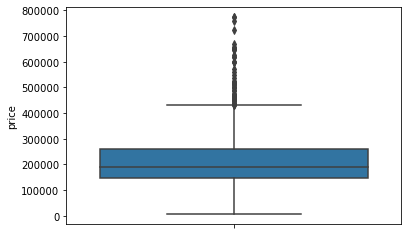

In [4]:
sns.boxplot(y = 'price', data=df)

In [5]:
q1 = np.percentile(df['price'],25)
q3 =np.percentile(df['price'], 75)
iqr = q3 - q1
iqr

114000.0

<AxesSubplot:title={'center':'Correlation Heatmap of Dataset'}>

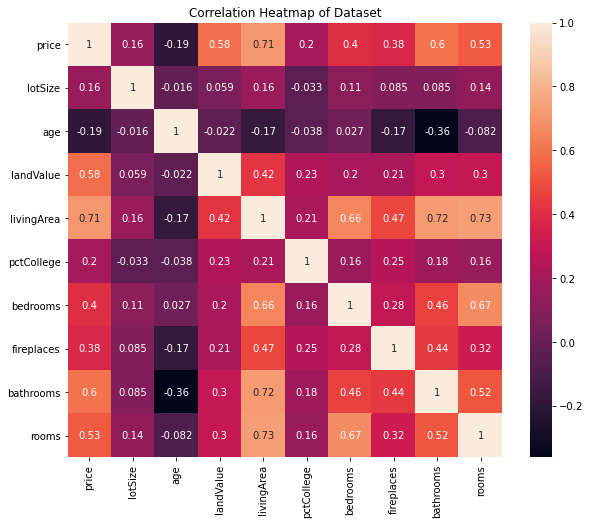

In [6]:
num = df._get_numeric_data()
corr_matrix = num.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap of Dataset')
sns.heatmap(corr_matrix, annot=True, square=True, linecolor='black')

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'lotSize'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'landValue'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'pctCollege'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'fireplaces'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'rooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

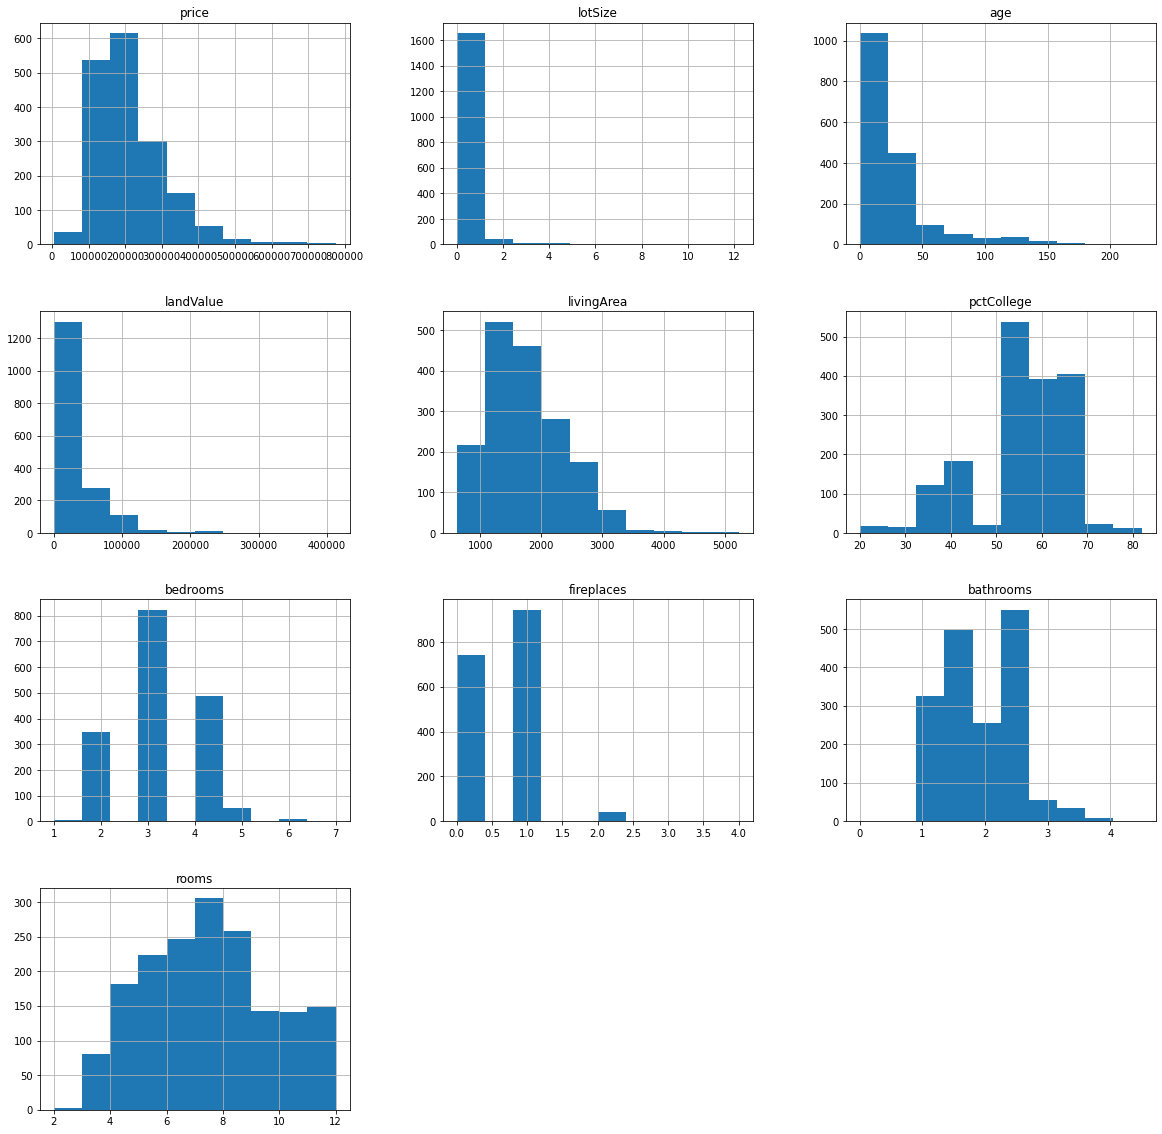

In [7]:
df.hist(figsize=(20,20))

In [8]:
df[df['price'] > (1.5*iqr + q3)]['price'].index

Int64Index([  28,  233,  313,  434,  477,  548,  553,  570,  578,  590,  591,
             601,  611,  625,  628,  638,  665,  684,  686,  701,  710,  715,
             725,  729,  843,  940,  961,  981,  986, 1059, 1169, 1194, 1201,
            1206, 1216, 1224, 1238, 1245, 1253, 1274, 1278, 1285, 1305, 1325,
            1329, 1347, 1419, 1491, 1540, 1549, 1569, 1621, 1720],
           dtype='int64')

In [9]:
df[df['price'] < (q1 - (1.5*iqr))]['price'].index

Int64Index([], dtype='int64')

In [10]:
df_outliers = df.iloc[df[df['price'] > (1.5*iqr + q3)]['price'].index]
df_outliers

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,Unnamed: 16
28,457000,0.43,53,2700,2461,39,4,1,2.0,10,hot,air,oil,public/commercial,Yes,No,No
233,490000,0.34,18,79700,1346,52,3,1,2.0,6,hot,air,oil,public/commercial,Yes,No,No
313,625000,0.45,14,119500,5228,64,4,4,4.0,12,hot,air,gas,public/commercial,No,No,Yes
434,435000,1.00,25,25000,4211,57,5,2,3.5,12,hot,water/steam,gas,septic,No,No,No
477,520000,0.41,13,3100,2702,47,3,1,2.5,11,hot,air,oil,public/commercial,No,No,No
548,512971,0.01,0,12500,1904,57,2,1,2.0,8,hot,air,gas,public/commercial,No,No,Yes
553,559000,0.24,55,255000,3090,57,4,2,4.0,12,hot,water/steam,gas,public/commercial,No,No,Yes
570,760000,1.22,2,194700,3148,57,5,0,3.5,12,hot,air,gas,septic,No,No,Yes
578,496000,0.34,3,82400,3467,57,4,1,2.5,11,hot,air,gas,public/commercial,No,No,Yes
590,620000,1.06,14,125100,4856,57,5,2,4.0,12,hot,air,oil,septic,No,No,Yes


In [11]:
df1_without_outliers = df.copy()
df1_without_outliers.drop(index=df[df['price'] > (1.5*iqr + q3)]['price'].index, inplace= True)
df1_without_outliers.drop('Unnamed: 16', axis=1, inplace=True)
df1_without_outliers

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot,water/steam,gas,septic,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot,water/steam,gas,public/commercial,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot,air,gas,septic,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot,air,gas,public/commercial,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot,water/steam,gas,public/commercial,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot,water/steam,gas,public/commercial,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot,air,gas,public/commercial,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot,air,gas,public/commercial,No,No


In [12]:
df1_without_outliers.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.00000,1675.000000
mean,201649.202388,0.489015,28.150448,32491.713433,1719.871045,55.444776,3.141493,0.586269,1.87403,6.943881
std,78907.071237,0.639103,29.079281,30524.577190,577.994488,10.439438,0.814836,0.538973,0.63965,2.257435
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.00000,2.000000
25%,144200.000000,0.170000,13.000000,15100.000000,1294.000000,52.000000,3.000000,0.000000,1.50000,5.000000
50%,186500.000000,0.370000,19.000000,24800.000000,1612.000000,57.000000,3.000000,1.000000,2.00000,7.000000
75%,249900.000000,0.540000,34.000000,38300.000000,2098.500000,64.000000,4.000000,1.000000,2.50000,8.000000
max,430000.000000,8.970000,225.000000,250000.000000,4534.000000,82.000000,7.000000,3.000000,4.50000,12.000000


# Machine Learning models:

In [13]:
numeric_data = df1_without_outliers._get_numeric_data()
numeric_data

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6
2,109000,0.19,133,7300,1944,51,4,1,1.0,8
3,155000,0.41,13,18700,1944,51,3,1,1.5,5
4,86060,0.11,0,15000,840,51,2,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7


In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num = scale.fit_transform(numeric_data)

In [15]:
new_num = pd.DataFrame(num, columns=numeric_data.columns.values)

In [16]:
new_num.drop(labels=['price'], inplace=True, axis = 1)
new_num

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,-0.624522,0.476411,0.573751,-1.408515,-1.959002,-1.401304,0.767858,-1.366827,-0.861359
1,0.674561,-0.968348,-0.333985,0.403462,-0.425895,-0.173697,-1.088075,0.978906,-0.418246
2,-0.468006,3.606721,-0.825539,0.387886,-0.425895,1.053910,0.767858,-1.366827,0.467980
3,-0.123671,-0.521160,-0.451958,0.387886,-0.425895,-0.173697,0.767858,-0.584916,-0.861359
4,-0.593219,-0.968348,-0.573208,-1.522737,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585
...,...,...,...,...,...,...,...,...,...
1670,-0.170626,0.132421,-0.271722,1.021299,0.532297,2.281516,0.767858,0.978906,1.797319
1671,0.705864,0.304416,0.121522,1.460881,0.532297,1.053910,0.767858,0.978906,1.797319
1672,-0.154974,-0.658757,-0.396249,-1.074502,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585
1673,-0.389748,0.682805,-0.514222,-0.856442,-0.425895,-0.173697,0.767858,-1.366827,0.024867


In [17]:
pric = df1_without_outliers[['price']]
pric = pric.reset_index()
pric.drop(labels=['index'], axis = 1, inplace=True)
pric

,price
0,132500
1,181115
2,109000
3,155000
4,86060
...,...
1670,289000
1671,285000
1672,194900
1673,125000


In [18]:
numeric_data = pd.concat([pric, new_num], axis = 1)
numeric_data

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,132500,-0.624522,0.476411,0.573751,-1.408515,-1.959002,-1.401304,0.767858,-1.366827,-0.861359
1,181115,0.674561,-0.968348,-0.333985,0.403462,-0.425895,-0.173697,-1.088075,0.978906,-0.418246
2,109000,-0.468006,3.606721,-0.825539,0.387886,-0.425895,1.053910,0.767858,-1.366827,0.467980
3,155000,-0.123671,-0.521160,-0.451958,0.387886,-0.425895,-0.173697,0.767858,-0.584916,-0.861359
4,86060,-0.593219,-0.968348,-0.573208,-1.522737,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585
...,...,...,...,...,...,...,...,...,...,...
1670,289000,-0.170626,0.132421,-0.271722,1.021299,0.532297,2.281516,0.767858,0.978906,1.797319
1671,285000,0.705864,0.304416,0.121522,1.460881,0.532297,1.053910,0.767858,0.978906,1.797319
1672,194900,-0.154974,-0.658757,-0.396249,-1.074502,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585
1673,125000,-0.389748,0.682805,-0.514222,-0.856442,-0.425895,-0.173697,0.767858,-1.366827,0.024867


In [19]:
df1_without_outliers['fuel'].value_counts()

air            1075
water/steam     297
electric        296
gas               6
oil               1
Name: fuel, dtype: int64

# Performing One way Anova test conducted for categorical independent variables:

In [20]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df1_without_outliers.groupby('fuel')['price'].apply(list)

print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_fuel = f_oneway(*CategoryGroupLists)
print(AnovaResults_fuel)
print('P-Value for Anova: ', AnovaResults_fuel[1])

fuel
air            [155000, 86060, 120000, 170000, 122900, 325000...
electric       [132500, 90000, 85860, 112000, 104900, 90400, ...
gas             [102900, 155000, 190000, 144500, 148900, 255000]
oil                                                     [200000]
water/steam    [181115, 109000, 153000, 97000, 89900, 60000, ...
Name: price, dtype: object
F_onewayResult(statistic=28.363786694495857, pvalue=7.900815413504777e-23)
P-Value for Anova:  7.900815413504777e-23


In [21]:
CategoryGroupLists=df1_without_outliers.groupby('sewer')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_sewer = f_oneway(*CategoryGroupLists)
print(AnovaResults_sewer)
print('P-Value for Anova is: ', AnovaResults_sewer[1])

F_onewayResult(statistic=33.316972458009694, pvalue=1.675242950924479e-32)
P-Value for Anova is:  1.675242950924479e-32


In [22]:
CategoryGroupLists=df1_without_outliers.groupby('waterfront')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_waterfront = f_oneway(*CategoryGroupLists)
print(AnovaResults_waterfront)
print('P-Value for Anova is: ', AnovaResults_waterfront[1])

F_onewayResult(statistic=43.62070859577885, pvalue=7.344728704470087e-35)
P-Value for Anova is:  7.344728704470087e-35


In [23]:
CategoryGroupLists=df1_without_outliers.groupby('newConstruction')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_newConstruction = f_oneway(*CategoryGroupLists)
print(AnovaResults_newConstruction)
print('P-Value for Anova is: ', AnovaResults_newConstruction[1])

F_onewayResult(statistic=4.611407845513058, pvalue=0.031903249416035354)
P-Value for Anova is:  0.031903249416035354


In [24]:
CategoryGroupLists=df1_without_outliers.groupby('centralAir')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_centralAir = f_oneway(*CategoryGroupLists)
print(AnovaResults_centralAir)
print('P-Value for Anova is: ', AnovaResults_centralAir[1])

F_onewayResult(statistic=28.597025286535445, pvalue=1.0140876130212626e-07)
P-Value for Anova is:  1.0140876130212626e-07


In [25]:
CategoryGroupLists=df1_without_outliers.groupby('heating')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults_heating = f_oneway(*CategoryGroupLists)
print(AnovaResults_heating)
print('P-Value for Anova is: ', AnovaResults_heating[1])

F_onewayResult(statistic=109.90189145019265, pvalue=5.9920227518136975e-25)
P-Value for Anova is:  5.9920227518136975e-25


In [26]:
print('Below are the P-values for Categorical Independent Variables: \n')
print('P-Value for Fuel is: ', AnovaResults_fuel[1])
print('P-Value for Sewer is: ', AnovaResults_sewer[1])
print('P-Value for waterFront is: ', AnovaResults_waterfront[1])
print('P-Value for newConstruction is: ', AnovaResults_newConstruction[1])
print('P-Value for centralAir is: ', AnovaResults_centralAir[1])
print('P-Value for heating is: ', AnovaResults_heating[1])

Below are the P-values for Categorical Independent Variables: 

P-Value for Fuel is:  7.900815413504777e-23
P-Value for Sewer is:  1.675242950924479e-32
P-Value for waterFront is:  7.344728704470087e-35
P-Value for newConstruction is:  0.031903249416035354
P-Value for centralAir is:  1.0140876130212626e-07
P-Value for heating is:  5.9920227518136975e-25


# Creating dummy variables for all the categorical independent variables:

In [27]:
house_categ = pd.get_dummies(df1_without_outliers.iloc[:, 10:], drop_first=True).reset_index()
house_categ.drop(labels=['index'], inplace =True, axis = 1)

In [28]:
df1_with_dummy_no_outliers = pd.concat([numeric_data, house_categ], axis = 1)
df1_with_dummy_no_outliers

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,sewer_none,sewer_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,waterfront_none,waterfront_public/commercial,waterfront_septic,newConstruction_Yes,centralAir_Yes
0,132500,-0.624522,0.476411,0.573751,-1.408515,-1.959002,-1.401304,0.767858,-1.366827,-0.861359,...,0,0,0,1,0,0,0,0,0,0
1,181115,0.674561,-0.968348,-0.333985,0.403462,-0.425895,-0.173697,-1.088075,0.978906,-0.418246,...,0,0,0,0,0,0,0,1,0,0
2,109000,-0.468006,3.606721,-0.825539,0.387886,-0.425895,1.053910,0.767858,-1.366827,0.467980,...,0,0,0,0,0,0,1,0,0,0
3,155000,-0.123671,-0.521160,-0.451958,0.387886,-0.425895,-0.173697,0.767858,-0.584916,-0.861359,...,0,0,0,0,0,0,0,1,0,0
4,86060,-0.593219,-0.968348,-0.573208,-1.522737,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,289000,-0.170626,0.132421,-0.271722,1.021299,0.532297,2.281516,0.767858,0.978906,1.797319,...,0,0,0,0,0,0,1,0,0,0
1671,285000,0.705864,0.304416,0.121522,1.460881,0.532297,1.053910,0.767858,0.978906,1.797319,...,0,0,0,0,0,0,1,0,0,0
1672,194900,-0.154974,-0.658757,-0.396249,-1.074502,-0.425895,-1.401304,-1.088075,-1.366827,-1.747585,...,0,0,0,0,0,0,1,0,0,0
1673,125000,-0.389748,0.682805,-0.514222,-0.856442,-0.425895,-0.173697,0.767858,-1.366827,0.024867,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df1_with_dummy_no_outliers.shape

(1675, 26)

In [30]:
df1_with_dummy_no_outliers.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,sewer_none,sewer_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,waterfront_none,waterfront_public/commercial,waterfront_septic,newConstruction_Yes,centralAir_Yes
count,1675.000000,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,...,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,201649.202388,-5.054000e-18,-4.944635e-17,-1.117348e-16,1.912235e-16,-1.004172e-16,1.998733e-16,-7.198222e-17,-2.219120e-16,-1.201692e-16,...,0.000597,0.124776,0.131940,0.048358,0.001791,0.005970,0.570149,0.242985,0.004776,0.079403
std,78907.071237,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,...,0.024434,0.330564,0.338527,0.214586,0.042295,0.077059,0.495202,0.429014,0.068965,0.270447
min,5000.000000,-7.653866e-01,-9.683477e-01,-1.058208e+00,-1.910400e+00,-3.396290e+00,-2.628911e+00,-1.088075e+00,-2.930650e+00,-2.190698e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144200.000000,-4.993094e-01,-5.211605e-01,-5.699311e-01,-7.370282e-01,-3.300757e-01,-1.736972e-01,-1.088075e+00,-5.849162e-01,-8.613587e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,186500.000000,-1.862774e-01,-3.147664e-01,-2.520595e-01,-1.866856e-01,1.490203e-01,-1.736972e-01,7.678577e-01,1.969949e-01,2.486723e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,249900.000000,7.979979e-02,2.012188e-01,1.903391e-01,6.552693e-01,8.197547e-01,1.053910e+00,7.678577e-01,9.789060e-01,4.679802e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,430000.000000,1.327410e+01,6.771431e+00,7.127805e+00,4.870236e+00,2.544500e+00,4.736730e+00,4.479724e+00,4.106551e+00,2.240432e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df1_with_dummy_no_outliers.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating_hot',
       'fuel_electric', 'fuel_gas', 'fuel_oil', 'fuel_water/steam',
       'sewer_gas', 'sewer_none', 'sewer_oil', 'sewer_public/commercial',
       'sewer_septic', 'waterfront_Yes', 'waterfront_none',
       'waterfront_public/commercial', 'waterfront_septic',
       'newConstruction_Yes', 'centralAir_Yes'],
      dtype='object')

# Creating target and independent variables:

In [32]:
target = df1_with_dummy_no_outliers.iloc[:, 0]
independents = df1_with_dummy_no_outliers.iloc[:,1:]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(independents, target, test_size = 0.2)

In [35]:
x_train.shape, x_test.shape

((1340, 25), (335, 25))

# Building Linear Regression to calculate intercept:

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print('The intercept is:', lm.intercept_)

The intercept is: 202053.71299206975


In [38]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

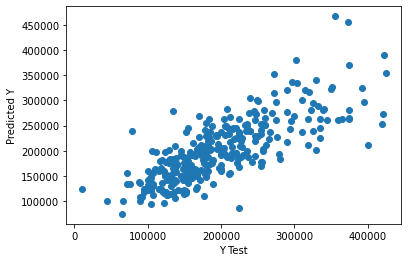

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
import sklearn.metrics as m

In [41]:
m.r2_score(y_test, predictions)

0.6084320849535112

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


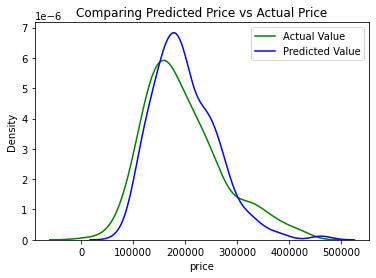

In [42]:
ax0 = sns.distplot(y_test, hist=False, color='green', label="Actual Value")
fig = sns.distplot(predictions, hist = False, color = 'b', label = "Predicted Value", ax = ax0)
fig.set_title('Comparing Predicted Price vs Actual Price')
fig.legend()

In [43]:
import statsmodels.api as sm
x = sm.add_constant(independents)
#results will contain output of Ordinary Least Squares(OLS). Fit will apply a technique to obrain the fit of the model.
results = sm.OLS(target,x).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:58:56   Log-Likelihood:                -20420.
No. Observations:                1675   AIC:                         4.089e+04
Df Residuals:                    1652   BIC:                         4.101e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.376e+05   1.13e+04     12.133      0.000    1.15e+05     1.6e+05
lotSize                       5237.6771   1334.807      3.924      0.000    2619.585    7855.769
age                          -5807.2665   1418.339     -4.094      0.000   -8589.199   -3025.335
landValue                     2.346e+04   1361.577     17.227      0.000    2.08e+04    2.61e+04
livingArea                    3.424e+04   2335.721     14.661      0.000    2.97e+04    3.88e+04
pctCollege                    1154.8888   1283.769      0.900      0.368   -1363.097    3672.875
bedrooms                     -1932.5188   1778.184     -1.087      0.277   -5420.252    1555.214
fireplaces                    1099.0049   1357.487      0.810      0.418   -1563.571    3761.580
bathrooms                     1.407e+04   1804.280      7.798      0.000    1.05e+04    1.76e+04
rooms                         3089.6612   1816.475      1.701      0.089    -473.176    6652.498
heating_hot                    4.13e+04   1.12e+04      3.678      0.000    1.93e+04    6.33e+04
fuel_electric                 2.094e+04   1.37e+04      1.531      0.126   -5893.638    4.78e+04
fuel_gas                      2.466e+04   1.96e+04      1.260      0.208   -1.37e+04    6.31e+04
fuel_oil                      5.074e+04   3.74e+04      1.358      0.175   -2.25e+04    1.24e+05
fuel_water/steam             -7996.6400   3350.743     -2.387      0.017   -1.46e+04   -1424.490
sewer_gas                     8393.2359   1.22e+04      0.687      0.492   -1.56e+04    3.23e+04
sewer_none                    1.409e+04   3.67e+04      0.384      0.701    -5.8e+04    8.61e+04
sewer_oil                     3724.0087   1.29e+04      0.289      0.773   -2.16e+04     2.9e+04
sewer_public/commercial       3.568e+04   1.31e+04      2.727      0.006       1e+04    6.13e+04
sewer_septic                  4.658e+04   1.33e+04      3.507      0.000    2.05e+04    7.26e+04
waterfront_Yes                1.495e+05   2.81e+04      5.318      0.000    9.44e+04    2.05e+05
waterfront_none               4104.6226   1.18e+04      0.349      0.727    -1.9e+04    2.72e+04
waterfront_public/commercial   1.95e+04   5671.166      3.438      0.001    8375.179    3.06e+04
waterfront_septic              1.77e+04   5824.927      3.038      0.002    6271.549    2.91e+04
newConstruction_Yes           8.858e+04   1.72e+04      5.146      0.000    5.48e+04    1.22e+05
centralAir_Yes               -1.937e+04   4765.436     -4.065      0.000   -2.87e+04      -1e+04
==============================================================================
Omnibus:                       84.310   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.424
Skew:                           0

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(LinearRegression(), k_features=15, forward=True, verbose=2, cv = 5)
forward_features = feature_selector.fit(x_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-03-14 17:58:56] Features: 1/15 -- score: 0.5111069111228895[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-03-14 17:58:56] Features: 2/15 -- score: 0.5846096682306754[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-03-14 17:58:56] Features: 3/15 -- score: 0.6072389377421381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [45]:
forward_features.get_params()

{'clone_estimator': True,
 'cv': 5,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(),
 'fixed_features': None,
 'floating': False,
 'forward': True,
 'k_features': 15,
 'n_jobs': 1,
 'pre_dispatch': '2*n_jobs',
 'scoring': None,
 'verbose': 2,
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

In [46]:
forward_selection_features = forward_features.subsets_
forward_selection_features

{1: {'feature_idx': (3,),
  'cv_scores': array([0.47897933, 0.50075803, 0.40147257, 0.54270395, 0.63162067]),
  'avg_score': 0.5111069111228895,
  'feature_names': ('livingArea',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.55816732, 0.58412686, 0.49928952, 0.61799878, 0.66346586]),
  'avg_score': 0.5846096682306754,
  'feature_names': ('landValue', 'livingArea')},
 3: {'feature_idx': (2, 3, 7),
  'cv_scores': array([0.58478677, 0.60217482, 0.53035798, 0.63060917, 0.68826594]),
  'avg_score': 0.6072389377421381,
  'feature_names': ('landValue', 'livingArea', 'bathrooms')},
 4: {'feature_idx': (1, 2, 3, 7),
  'cv_scores': array([0.59032343, 0.61128304, 0.5331462 , 0.63337513, 0.69142256]),
  'avg_score': 0.6119100741125865,
  'feature_names': ('age', 'landValue', 'livingArea', 'bathrooms')},
 5: {'feature_idx': (1, 2, 3, 7, 24),
  'cv_scores': array([0.58150937, 0.61409109, 0.53787117, 0.63916588, 0.7000624 ]),
  'avg_score': 0.6145399809033707,
  'feature_names': ('age',
   '

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(LinearRegression(), k_features=15, forward=False, verbose=2, cv = 5)
backward_features = feature_selector.fit(x_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-03-14 17:58:57] Features: 24/15 -- score: 0.6121196812566339[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-03-14 17:58:58] Features: 23/15 -- score: 0.6152421338899815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-03-14 17:58:58] Features: 22/15 -- score: 0.6172907684894436[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [48]:
backward_selection_features = backward_features.subsets_
backward_selection_features

{25: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24),
  'cv_scores': array([ 5.81198513e-01,  6.21779993e-01, -2.70957272e+23,  6.40645584e-01,
          6.74007635e-01]),
  'avg_score': -5.419145439719077e+22,
  'feature_names': ('lotSize',
   'age',
   'landValue',
   'livingArea',
   'pctCollege',
   'bedrooms',
   'fireplaces',
   'bathrooms',
   'rooms',
   'heating_hot',
   'fuel_electric',
   'fuel_gas',
   'fuel_oil',
   'fuel_water/steam',
   'sewer_gas',
   'sewer_none',
   'sewer_oil',
   'sewer_public/commercial',
   'sewer_septic',
   'waterfront_Yes',
   'waterfront_none',
   'waterfront_public/commercial',
   'waterfront_septic',
   'newConstruction_Yes',
   'centralAir_Yes')},
 24: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   2

In [49]:
#indepedents_shortlisted = df1_with_dummy_no_outliers['lotSize','age','landValue','livingArea','bathrooms','heating_hot','fuel_water/steam','sewer_public/commercial','sewer_septic','waterfront_Yes','waterfront_public/commercial','waterfront_septic','newConstruction_Yes','centralAir_Yes']

In [50]:
dic_forward = forward_features.subsets_
dic_forward[15]['feature_idx']
wrapper_features_forward = independents.iloc[:, list(dic_forward[15]['feature_idx'])]

In [51]:
from sklearn.preprocessing import PolynomialFeatures
x_interactions_forward = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(wrapper_features_forward)
poly_forward = PolynomialFeatures(2, interaction_only=True, include_bias=False)
poly_forward.fit_transform(wrapper_features_forward)

array([[-0.62452216,  0.47641096,  0.57375128, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67456056, -0.96834769, -0.3339852 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.46800617,  3.60672137, -0.82553926, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.15497419, -0.65875655, -0.39624872, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38974818,  0.68280505, -0.51422169, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15805779,  1.98996764, -0.2127352 , ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
wrapper_features_forward

,lotSize,age,landValue,livingArea,fireplaces,bathrooms,fuel_oil,fuel_water/steam,sewer_gas,sewer_none,sewer_oil,sewer_septic,waterfront_Yes,waterfront_none,centralAir_Yes
0,-0.624522,0.476411,0.573751,-1.408515,0.767858,-1.366827,0,0,0,0,0,1,0,0,0
1,0.674561,-0.968348,-0.333985,0.403462,-1.088075,0.978906,0,1,1,0,0,0,0,0,0
2,-0.468006,3.606721,-0.825539,0.387886,0.767858,-1.366827,0,1,1,0,0,0,0,0,0
3,-0.123671,-0.521160,-0.451958,0.387886,0.767858,-0.584916,0,0,1,0,0,0,0,0,0
4,-0.593219,-0.968348,-0.573208,-1.522737,-1.088075,-1.366827,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,-0.170626,0.132421,-0.271722,1.021299,0.767858,0.978906,0,1,1,0,0,0,0,0,0
1671,0.705864,0.304416,0.121522,1.460881,0.767858,0.978906,0,1,1,0,0,0,0,0,0
1672,-0.154974,-0.658757,-0.396249,-1.074502,-1.088075,-1.366827,0,0,1,0,0,0,0,0,0
1673,-0.389748,0.682805,-0.514222,-0.856442,0.767858,-1.366827,0,0,1,0,0,0,0,0,0


In [53]:
poly_forward.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x6 x14',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x7 x14',
 'x8 x9',


In [54]:
pd.DataFrame(x_interactions_forward)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.624522,0.476411,0.573751,-1.408515,0.767858,-1.366827,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.674561,-0.968348,-0.333985,0.403462,-1.088075,0.978906,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.468006,3.606721,-0.825539,0.387886,0.767858,-1.366827,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.123671,-0.521160,-0.451958,0.387886,0.767858,-0.584916,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.593219,-0.968348,-0.573208,-1.522737,-1.088075,-1.366827,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,-0.170626,0.132421,-0.271722,1.021299,0.767858,0.978906,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,0.705864,0.304416,0.121522,1.460881,0.767858,0.978906,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,-0.154974,-0.658757,-0.396249,-1.074502,-1.088075,-1.366827,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673,-0.389748,0.682805,-0.514222,-0.856442,0.767858,-1.366827,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
sm.OLS(target, pd.DataFrame(x_interactions_forward)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              345.4
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                        0.00
Time:                        17:58:59   Log-Likelihood:                         -20584.
No. Observations:                1675   AIC:                                  4.132e+04
Df Residuals:                    1601   BIC:                                  4.172e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           -8.56e+04    1.5e+04     -5.720      0.000   -1.15e+05   -5.62e+04
1          -2.929e+05   1.54e+04    -18.980      0.000   -3.23e+05   -2.63e+05
2           -3.67e+04   1.13e+04     -3.256      0.001   -5.88e+04   -1.46e+04
3           3.174e+04   7132.583      4.451      0.000    1.78e+04    4.57e+04
4           4632.1525   4640.089      0.998      0.318   -4469.135    1.37e+04
5          -2.199e+04   6260.977     -3.512      0.000   -3.43e+04   -9705.867
6          -2.376e+04   1.03e+04     -2.305      0.021    -4.4e+04   -3543.492
7           1.493e+05   5.44e+04      2.746      0.006    4.26e+04    2.56e+05
8           2.055e+05   2292.844     89.648      0.000    2.01e+05     2.1e+05
9          -1.895e+04   1.74e+04     -1.091      0.275    -5.3e+04    1.51e+04
10          2.057e+05   6255.570     32.875      0.000    1.93e+05    2.18e+05
11          2.093e+05   9613.660     21.767      0.000     1.9e+05    2.28e+05
12          1.485e+05    2.2e+04      6.739      0.000    1.05e+05    1.92e+05
13          8.087e+04   8.16e+04      0.991      0.322   -7.92e+04    2.41e+05
14          8.103e+04   1.95e+04      4.158      0.000    4.28e+04    1.19e+05
15         -3668.7586   1821.402     -2.014      0.044   -7241.343     -96.175
16         -5326.9158   1682.918     -3.165      0.002   -8627.870   -2025.961
17          1235.7250   1949.726      0.634      0.526   -2588.558    5060.008
18           -14.1949   1809.945     -0.008      0.994   -3564.307    3535.917
19         -3817.9516   2166.627     -1.762      0.078   -8067.674     431.771
20         -2.941e+04   1.28e+04     -2.305      0.021   -5.44e+04   -4386.908
21          6092.1833   4033.512      1.510      0.131   -1819.336     1.4e+04
22            9.2e+04   1.53e+04      6.000      0.000    6.19e+04    1.22e+05
23          5014.1571   4593.835      1.091      0.275   -3996.406     1.4e+04
24          9.032e+04   1.53e+04      5.906      0.000    6.03e+04     1.2e+05
25          8.085e+04   1.54e+04      5.242      0.000    5.06e+04    1.11e+05
26         -1118.1038   6234.915     -0.179      0.858   -1.33e+04    1.11e+04
27         -2.275e+04   3.47e+04     -0.655      0.513   -9.09e+04    4.54e+04
28          1.138e+04   8771.249      1.298      0.195   -5823.565    2.86e+04
29          2271.4313   1634.825      1.389      0.165    -935.191    5478.054
30          1714.1192   1935.636      0.886      0.376   -2082.527    5510.766
31         -4985.6130   1885.833     -2.644      0.008   -8684.575   -1286.651
32         -1478.6332   1965.644     -0.752      0.452   -5334.139    2376.872
33         -4.564e+04   1.98e+04     -2.305      0.021   -8.45e+04   -6807.650
34          1938.2321   3657.276      0.530      0.596   -523

In [56]:
dic_backward = backward_features.subsets_
dic_backward[15]['feature_idx']
wrapper_features_backward = independents.iloc[:, list(dic_backward[15]['feature_idx'])]

In [57]:
from sklearn.preprocessing import PolynomialFeatures
x_interactions_backward = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(wrapper_features_backward)
poly_backward = PolynomialFeatures(2, interaction_only=True, include_bias=False)
poly_backward.fit_transform(wrapper_features_backward)

array([[-0.62452216,  0.47641096,  0.57375128, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67456056, -0.96834769, -0.3339852 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.46800617,  3.60672137, -0.82553926, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.15497419, -0.65875655, -0.39624872, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38974818,  0.68280505, -0.51422169, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15805779,  1.98996764, -0.2127352 , ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
wrapper_features_backward

,lotSize,age,landValue,livingArea,fireplaces,bathrooms,fuel_water/steam,sewer_gas,sewer_none,sewer_oil,sewer_public/commercial,sewer_septic,waterfront_public/commercial,waterfront_septic,centralAir_Yes
0,-0.624522,0.476411,0.573751,-1.408515,0.767858,-1.366827,0,0,0,0,0,1,0,0,0
1,0.674561,-0.968348,-0.333985,0.403462,-1.088075,0.978906,1,1,0,0,0,0,0,1,0
2,-0.468006,3.606721,-0.825539,0.387886,0.767858,-1.366827,1,1,0,0,0,0,1,0,0
3,-0.123671,-0.521160,-0.451958,0.387886,0.767858,-0.584916,0,1,0,0,0,0,0,1,0
4,-0.593219,-0.968348,-0.573208,-1.522737,-1.088075,-1.366827,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,-0.170626,0.132421,-0.271722,1.021299,0.767858,0.978906,1,1,0,0,0,0,1,0,0
1671,0.705864,0.304416,0.121522,1.460881,0.767858,0.978906,1,1,0,0,0,0,1,0,0
1672,-0.154974,-0.658757,-0.396249,-1.074502,-1.088075,-1.366827,0,1,0,0,0,0,1,0,0
1673,-0.389748,0.682805,-0.514222,-0.856442,0.767858,-1.366827,0,1,0,0,0,0,1,0,0


In [59]:
poly_backward.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x6 x14',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x7 x14',
 'x8 x9',


In [60]:
pd.DataFrame(x_interactions_backward)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.624522,0.476411,0.573751,-1.408515,0.767858,-1.366827,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.674561,-0.968348,-0.333985,0.403462,-1.088075,0.978906,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.468006,3.606721,-0.825539,0.387886,0.767858,-1.366827,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.123671,-0.521160,-0.451958,0.387886,0.767858,-0.584916,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.593219,-0.968348,-0.573208,-1.522737,-1.088075,-1.366827,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,-0.170626,0.132421,-0.271722,1.021299,0.767858,0.978906,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,0.705864,0.304416,0.121522,1.460881,0.767858,0.978906,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,-0.154974,-0.658757,-0.396249,-1.074502,-1.088075,-1.366827,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673,-0.389748,0.682805,-0.514222,-0.856442,0.767858,-1.366827,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
sm.OLS(target, pd.DataFrame(x_interactions_backward)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     36.73
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          1.94e-318
Time:                        17:58:59   Log-Likelihood:                -20333.
No. Observations:                1675   AIC:                         4.084e+04
Df Residuals:                    1586   BIC:                         4.133e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           2.012e+04   5.13e+04      0.392      0.695   -8.06e+04    1.21e+05
1           2.205e+05   2.17e+05      1.014      0.311   -2.06e+05    6.47e+05
2           9.138e+04   3.66e+04      2.496      0.013    1.96e+04    1.63e+05
3           8446.7316   7.63e+04      0.111      0.912   -1.41e+05    1.58e+05
4          -1.425e+04   8.43e+04     -0.169      0.866    -1.8e+05    1.51e+05
5           5.169e+04      6e+04      0.862      0.389   -6.59e+04    1.69e+05
6           3.672e+04      4e+04      0.918      0.359   -4.18e+04    1.15e+05
7           3.356e+05   1.56e+05      2.154      0.031       3e+04    6.41e+05
8           1.102e+05   6.85e+04      1.609      0.108   -2.42e+04    2.45e+05
9           3.003e+05   7.42e+04      4.048      0.000    1.55e+05    4.46e+05
10          2.116e+05   7988.738     26.484      0.000    1.96e+05    2.27e+05
11          2.179e+05   7864.429     27.706      0.000    2.02e+05    2.33e+05
12          2.312e+05    4.3e+04      5.374      0.000    1.47e+05    3.16e+05
13          1.364e+05   4.63e+04      2.948      0.003    4.57e+04    2.27e+05
14         -8035.9456   8439.216     -0.952      0.341   -2.46e+04    8517.247
15         -3131.2930   1752.111     -1.787      0.074   -6567.990     305.404
16         -4476.3185   1522.989     -2.939      0.003   -7463.601   -1489.036
17          2216.1449   1820.548      1.217      0.224   -1354.790    5787.079
18           595.1633   1643.250      0.362      0.717   -2628.007    3818.334
19         -3002.4455   2022.968     -1.484      0.138   -6970.418     965.527
20          1195.8529   4084.103      0.293      0.770   -6814.956    9206.662
21         -3.862e+04   4.18e+04     -0.924      0.355   -1.21e+05    4.33e+04
22         -2.915e+04   1.81e+04     -1.609      0.108   -6.47e+04    6393.185
23          -3.98e+04   4.18e+04     -0.952      0.341   -1.22e+05    4.22e+04
24         -1344.8150   5.43e+04     -0.025      0.980   -1.08e+05    1.05e+05
25         -1.898e+04   5.15e+04     -0.369      0.712    -1.2e+05     8.2e+04
26          2.364e+04   3.01e+04      0.785      0.432   -3.54e+04    8.27e+04
27          2.721e+04   3.02e+04      0.901      0.367    -3.2e+04    8.64e+04
28         -1.242e+04   8148.847     -1.525      0.128   -2.84e+04    3558.699
29          1935.1486   1453.054      1.332      0.183    -914.961    4785.258
30           987.8088   1692.805      0.584      0.560   -2332.563    4308.180
31         -3965.0405   1708.875     -2.320      0.020   -7316.932    -613.149
32            94.5935   1703.048      0.056      0.956   -3245.869    3435.056
33          1030.3562   3254.524      0.317      0.752   -5353.265    7413.977
34         -5.377e+04   8.37e+04     -0.643      0.520   -2.18e+05     1.1e+05
35           -6.5e+04   4.04e+04     -1.609      0.108   -1.44e+05    1.43e+04
36

ValueError: x and y must be the same size

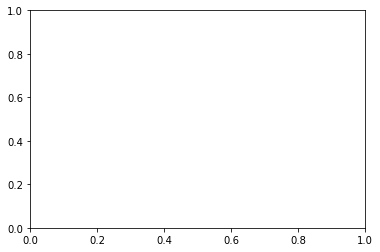

In [64]:
plt.scatter(x_interactions_backward, target)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')